In [1]:
from IPython.display import Image

# PyTorch Basics

In [2]:
import torch

In [3]:
x = torch.Tensor(5, 3)
print(x)


-7.4944e+22  4.5733e-41 -7.4944e+22
 4.5733e-41         nan  0.0000e+00
 4.4721e+21  1.6647e-41  6.7262e-44
 0.0000e+00  6.7262e-44  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]



In [4]:
y = torch.zeros(5, 3)
print(y)


 0  0  0
 0  0  0
 0  0  0
 0  0  0
 0  0  0
[torch.FloatTensor of size 5x3]



In [5]:
y[:3, 0] = 5
x[:, :] = 3

print(y, x)


 5  0  0
 5  0  0
 5  0  0
 0  0  0
 0  0  0
[torch.FloatTensor of size 5x3]
 
 3  3  3
 3  3  3
 3  3  3
 3  3  3
 3  3  3
[torch.FloatTensor of size 5x3]



In [6]:
print(torch.mul(x, y))
print(torch.matmul(x, y.t()))


 15   0   0
 15   0   0
 15   0   0
  0   0   0
  0   0   0
[torch.FloatTensor of size 5x3]


 15  15  15   0   0
 15  15  15   0   0
 15  15  15   0   0
 15  15  15   0   0
 15  15  15   0   0
[torch.FloatTensor of size 5x5]



# Logistic Regression

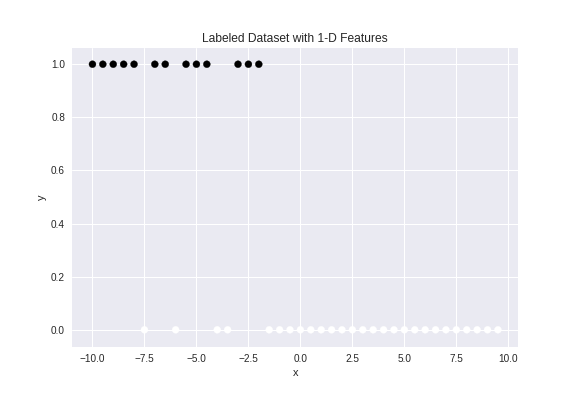

In [7]:
Image(filename='figures/figure_1.png')

$$
\sigma(x) = \frac{1}{1 + exp(-x)}
$$

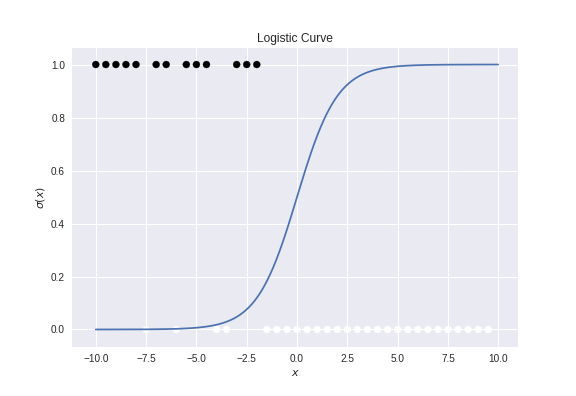

In [8]:
Image(filename='figures/figure_2.png')

$$
\sigma_w(x) = \frac{1}{1 + exp(-w\cdot x)}
$$

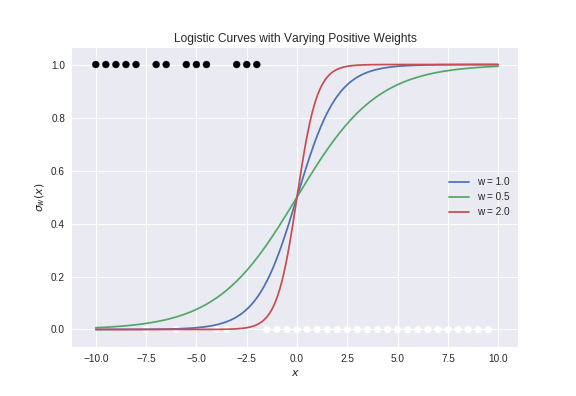

In [9]:
Image(filename='figures/figure_3.png')

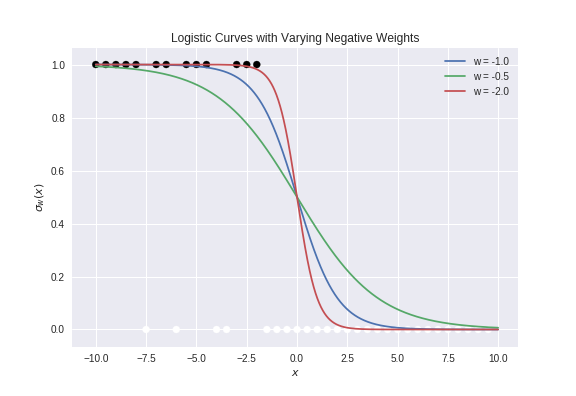

In [10]:
Image(filename='figures/figure_4.png')

$$
\sigma_b(x) = \frac{1}{1 + exp(-x + b)}
$$

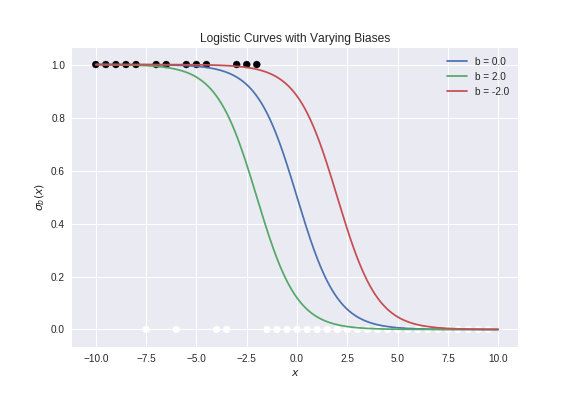

In [11]:
Image(filename='figures/figure_5.png')

$$
\sigma_\theta(x) = \frac{1}{1 + exp(-w\cdot x + b)}
$$

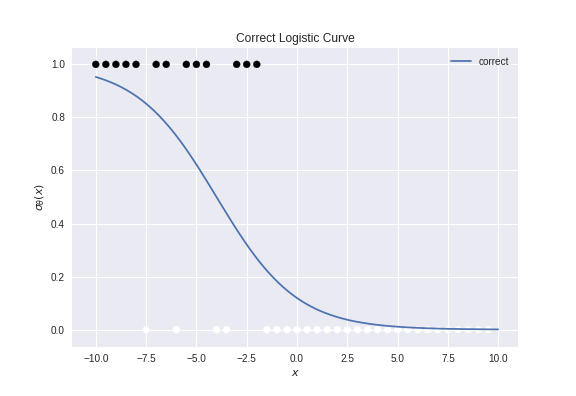

In [12]:
Image(filename='figures/figure_5a.png')

# Thinking in Higher Dimensions

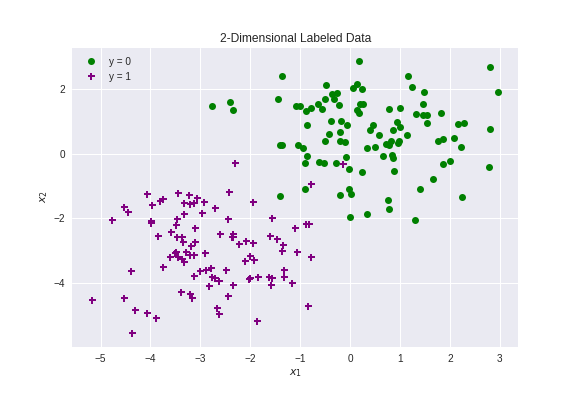

In [13]:
Image(filename='figures/figure_6.png')

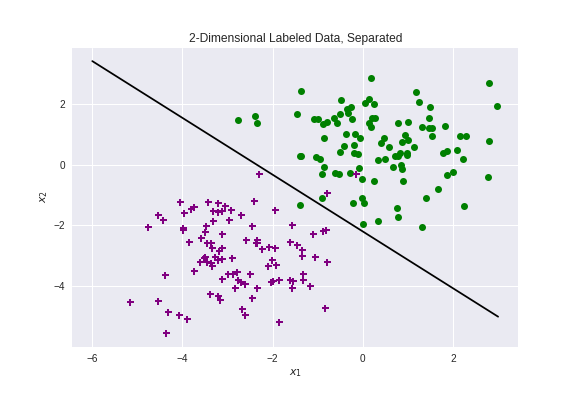

In [14]:
Image(filename='figures/figure_7.png')

$$
\sigma_\theta(x) = \frac{1}{1 + exp(-(\sum^{n}_{i=1}{w_i \cdot x_i}) + b)}
$$

$$
z_\theta = (\sum^{n}_{i=1}{w_i \cdot x_i}) - b
$$
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

$$
z_\theta = \vec{w} \cdot \vec{x} - b
$$

# Softmax Regeression

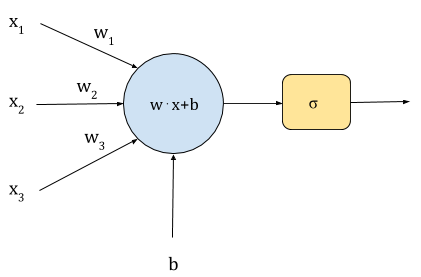

In [15]:
Image(filename='figures/perceptron.png')

$$
\sigma(\vec{z})_j = \frac{e^{z_j}}{\sum_{k=1}^{K}{e^{z_k}}}
$$

$$
\vec{z} = W \cdot \vec{x} + \vec{b}
$$

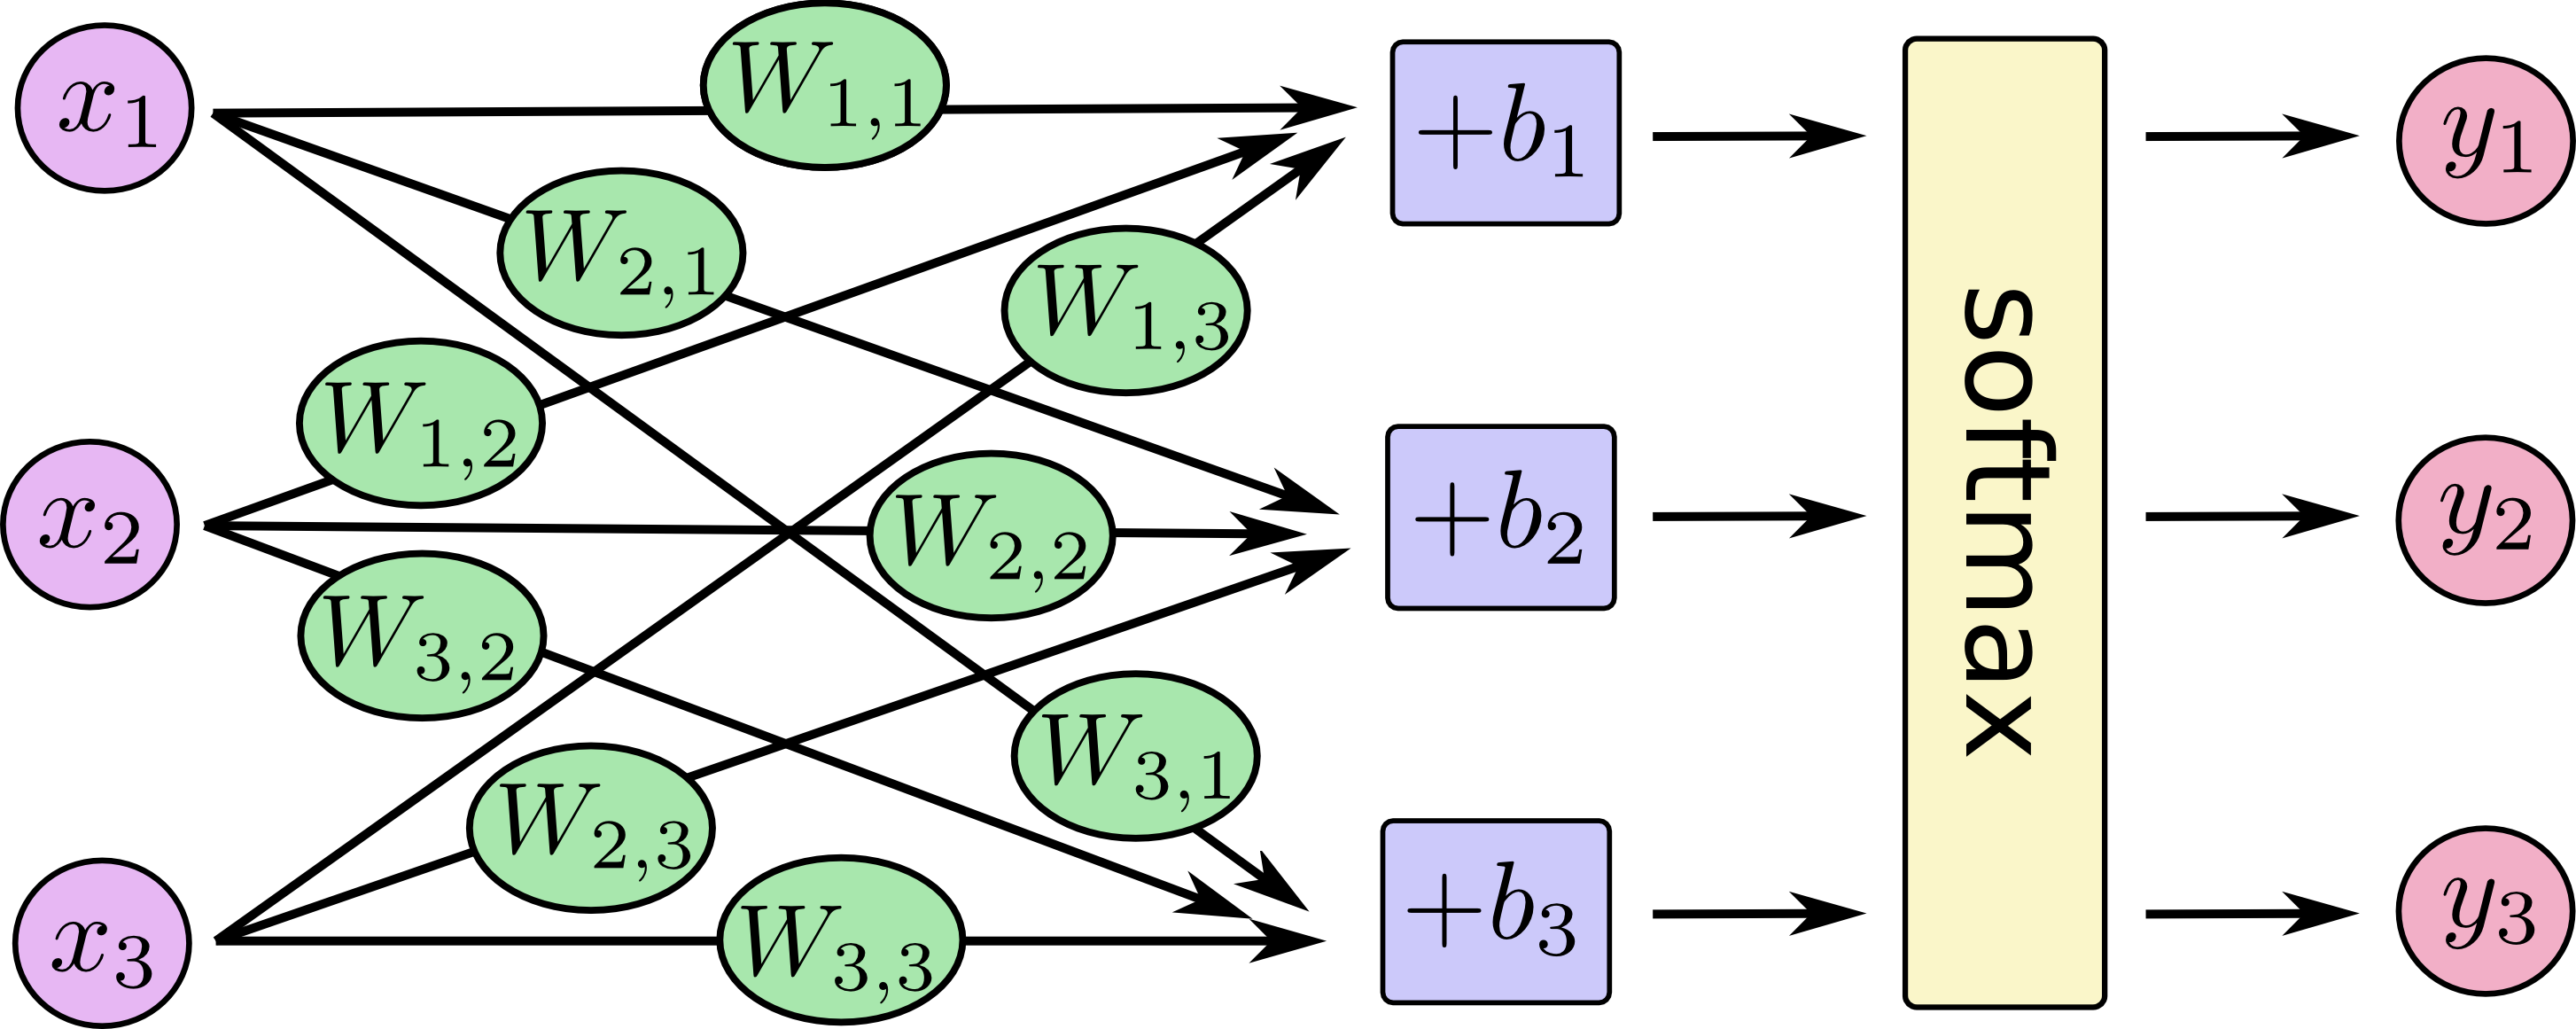

In [16]:
Image(filename='figures/softmax.png')

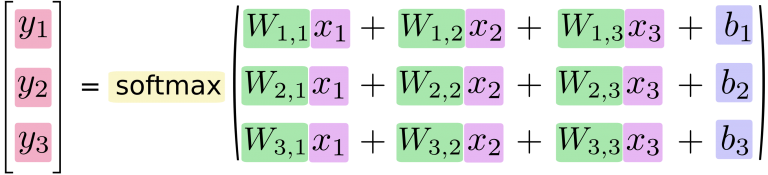

In [17]:
Image(filename='figures/softmax_eval.png')

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class SoftmaxRegression(nn.Module):
    def __init__(self, n_features, n_classes):
        super(SoftmaxRegression, self).__init__()
        self.z = nn.Linear(n_features, n_classes)
    
    def forward(self, x):
        return F.log_softmax(self.z(x), dim=1)

In [19]:
from torch.autograd import Variable

model = SoftmaxRegression(3, 2)
data_instance = Variable(torch.randn(1, 3))
model(data_instance)

Variable containing:
-0.2432 -1.5331
[torch.FloatTensor of size 1x2]

In [20]:
data_instance.data


-1.1124  2.1641  1.7875
[torch.FloatTensor of size 1x3]

In [21]:
print(data_instance.grad)

None


In [22]:
data_set = Variable(torch.randn(5, 3))
model(data_set)

Variable containing:
-0.8478 -0.5593
-1.0591 -0.4258
-0.2009 -1.7038
-0.5493 -0.8612
-0.7861 -0.6081
[torch.FloatTensor of size 5x2]

# Training

$$
L(y, \hat{y}) = \sqrt{\sum_{i}{(y_i - \hat{y_i})^2}}
$$

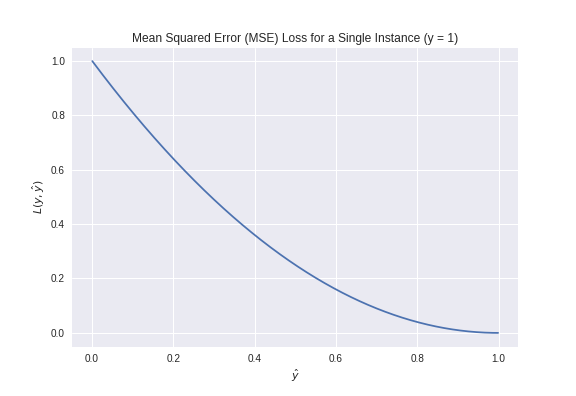

In [23]:
Image(filename='figures/figure_8.png')

$$
L(y, \hat{y}) = \sum_{i}{y_i \cdot log \hat{y_i}}
$$

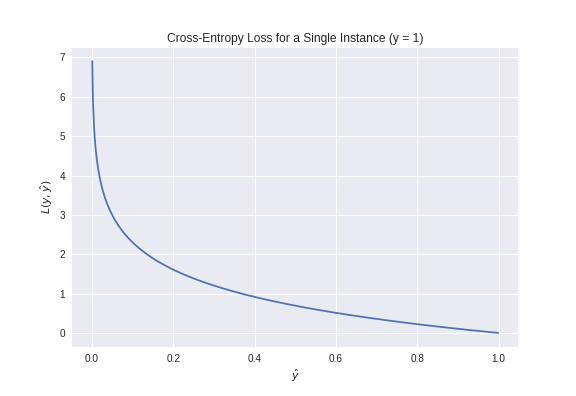

In [24]:
Image(filename='figures/figure_9.png')

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np

X, y = load_iris(return_X_y=True)
X = X.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
import torch.optim as optim

model = SoftmaxRegression(4, 3)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5000):
    # wrap our dataset in variables
    inputs, labels = Variable(torch.from_numpy(X_train)), Variable(torch.from_numpy(y_train))

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    # backward
    loss.backward()
    # optimize
    optimizer.step()
    
print('Finished Training')

Finished Training


In [27]:
_, labels = model(Variable(torch.from_numpy(X_test))).max(dim=1)
yhat = labels.data.numpy()

accuracy_score(yhat, y_test)

0.92105263157894735

# Feedforward Neural Networks

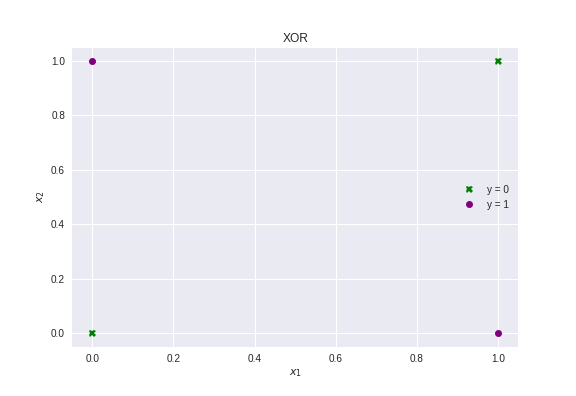

In [28]:
Image(filename='figures/figure_14.png')

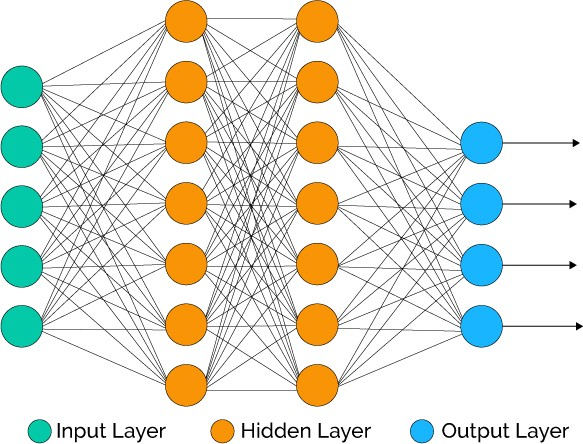

In [29]:
Image(filename='figures/network.jpg')

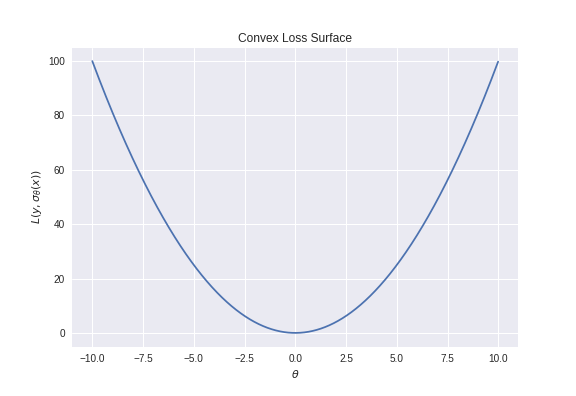

In [30]:
Image(filename='figures/figure_10.png')

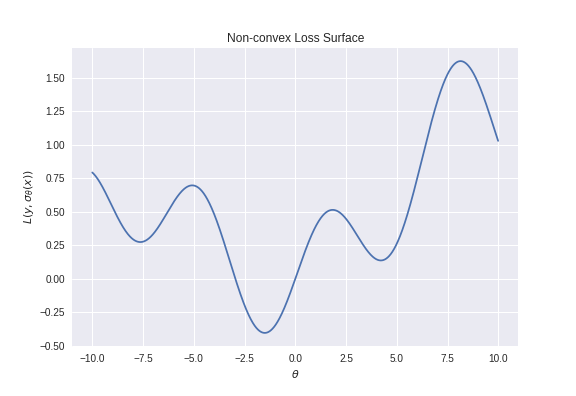

In [31]:
Image(filename='figures/figure_11.png')